## INGENIERIA DE CARACTERISTICAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

sns.set(style= "darkgrid")
sns.color_palette()
from scipy.stats import ks_2samp

In [2]:
data = pd.read_csv("D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/Financials_.csv")
data.head(5)

,Unnamed: 0,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,,32370.0,16185.0,16185.00,2014-01-01,1,January,2014
1,1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,,26420.0,13210.0,13210.00,2014-01-01,1,January,2014
2,2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,,32670.0,21780.0,10890.00,2014-01-06,6,June,2014
3,3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,,13320.0,8880.0,4440.00,2014-01-06,6,June,2014
4,4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,,37050.0,24700.0,12350.00,2014-01-06,6,June,2014


In [3]:
data.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              700 non-null    object 
 1   country              700 non-null    object 
 2   product              700 non-null    object 
 3   discount_band        700 non-null    object 
 4   units_sold           700 non-null    float64
 5   manufacturing_price  700 non-null    float64
 6   sale_price           700 non-null    float64
 7   gross_sales          700 non-null    float64
 8   discounts            700 non-null    object 
 9   sales                700 non-null    float64
 10  cogs                 700 non-null    float64
 11  profit               700 non-null    object 
 12  date                 700 non-null    object 
 13  month_number         700 non-null    int64  
 14  month_name           700 non-null    object 
 15  year                 700 non-null    int

In [5]:
data.isnull().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64

In [6]:
data.dtypes.value_counts()

object     8
float64    6
int64      2
Name: count, dtype: int64

In [7]:
null_values = ['NaN', 'nan', 'null', 'None', '', ' ']

# Reemplazar estos valores en el DataFrame con np.nan
data.replace(null_values, np.nan, inplace=True)
data['discounts'] = pd.to_numeric(data['discounts'], errors='coerce')
data['profit'] = pd.to_numeric(data['profit'], errors='coerce')
data['date'] = pd.to_datetime(data['date'], errors='coerce')

### 1_Valores Faltantes

In [8]:
data.shape

(700, 16)

#### Imputacion por Kmean

In [9]:
data = data.copy()
# Separar columnas numéricas y no numéricas
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

In [66]:
# Crear una instancia de KNNImputer
knn_imputer = KNNImputer()
# Aplicar el imputador a las columnas numéricas
data_numeric_imputed = pd.DataFrame(knn_imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)
# Recomponer el DataFrame original
data_imputed_knn = pd.concat([data[non_numeric_columns], data_numeric_imputed], axis=1)

In [25]:
def compare_statistics(column_name):
    original_stats = data[column_name].describe()
    imputed_stats = data_numeric_imputed[column_name].describe()
    stats_comparison = pd.DataFrame({'Original': original_stats, 'Imputed': imputed_stats})
    print(f"\nComparación de estadísticas para la columna: {column_name}")
    print(stats_comparison)

# Función para realizar la prueba de Kolmogorov-Smirnov
def ks_test(column_name):
    original_data = data[column_name].dropna()
    imputed_data = data_numeric_imputed[column_name]
    ks_stat, p_value = ks_2samp(original_data, imputed_data)
    print(f"\nPrueba KS para la columna {column_name}:")
    print(f"KS Statistic: {ks_stat}, P-value: {p_value}")
    
def plot_imputation_comparison(column_name):
    if column_name not in numeric_columns:
        raise ValueError(f"La columna {column_name} no es numérica o no existe en el DataFrame.")
    
    plt.figure(figsize=(14, 6))
    
    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    plt.scatter(data.index, data[column_name], label=f'{column_name} Original', alpha=0.5)
    plt.scatter(data.index, data_numeric_imputed[column_name], label=f'{column_name} Imputed', alpha=0.5, marker='x')
    plt.title(f'Comparación de Valores Originales e Imputados - {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    
    # Gráfico de densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[column_name], label=f'{column_name} Original', fill=True)
    sns.kdeplot(data_numeric_imputed[column_name], label=f'{column_name} Imputed', fill=True)
    plt.title(f'Comparación de Distribuciones Originales e Imputadas - {column_name}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Comparación de estadísticas para la columna: discounts
            Original        Imputed
count     647.000000     700.000000
mean    14227.586198   13707.959980
std     23562.833079   22896.678926
min        18.410000      18.410000
25%      1061.000000    1036.525000
50%      3108.000000    2959.200000
75%     18809.250000   18712.500000
max    149677.500000  149677.500000

Prueba KS para la columna discounts:
KS Statistic: 0.015268271141532347, P-value: 0.9999956407674638


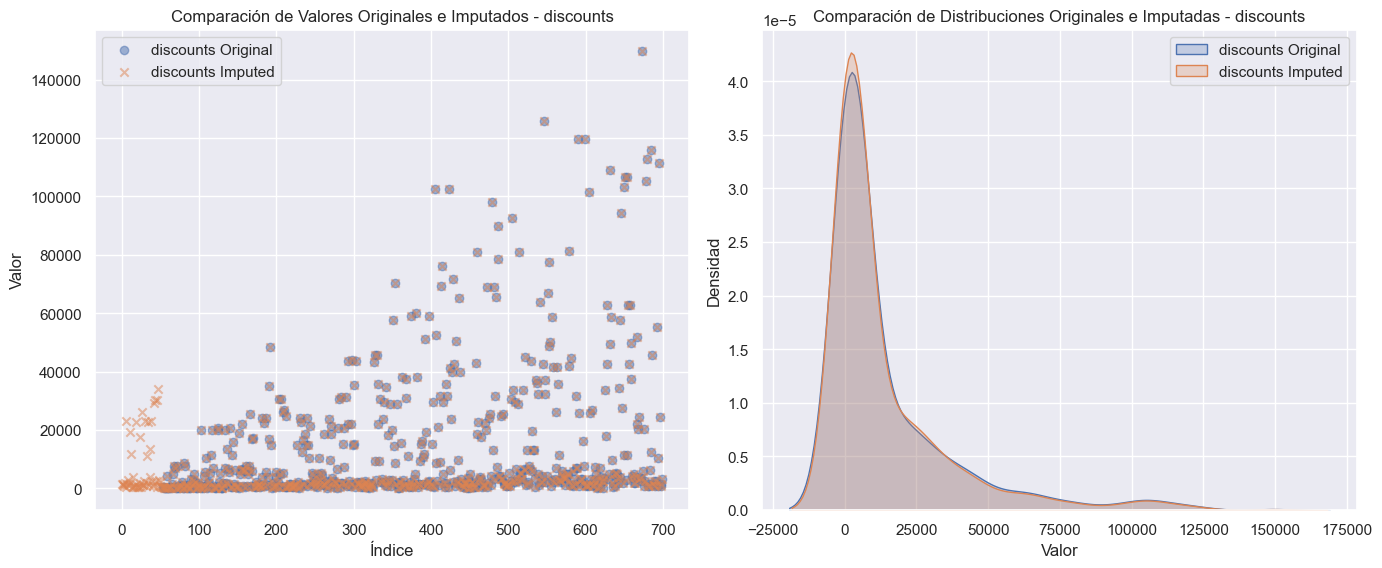

In [30]:
compare_statistics("discounts")
ks_test("discounts")
plot_imputation_comparison('discounts')


Comparación de estadísticas para la columna: profit
            Original       Imputed
count     637.000000     700.00000
mean    27741.010267   26433.16878
std     43059.332905   41375.19793
min       285.600000     285.60000
25%      3875.850000    4103.55000
50%     11106.100000   11364.60000
75%     25162.000000   23780.61000
max    262200.000000  262200.00000

Prueba KS para la columna profit:
KS Statistic: 0.018210361067503924, P-value: 0.9997805739979834


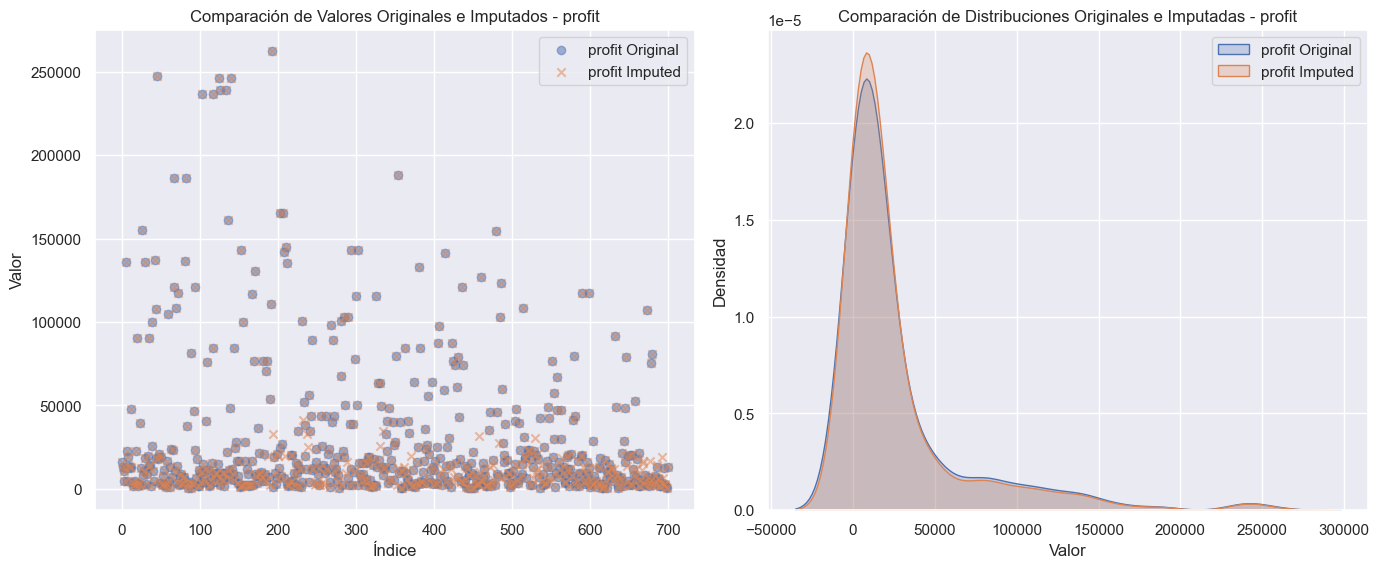

In [31]:
compare_statistics("profit")
ks_test("profit")
plot_imputation_comparison('profit')

#### Imputacion por MICE

In [35]:
def compare_statistics(column_name):
    original_stats = data[column_name].describe()
    imputed_stats = data_numeric_imputed[column_name].describe()
    stats_comparison = pd.DataFrame({'Original': original_stats, 'Imputed': imputed_stats})
    print(f"\nComparación de estadísticas para la columna: {column_name}")
    print(stats_comparison)

# Función para realizar la prueba de Kolmogorov-Smirnov
def ks_test(column_name):
    original_data = data[column_name].dropna()
    imputed_data = data_numeric_imputed[column_name]
    ks_stat, p_value = ks_2samp(original_data, imputed_data)
    print(f"\nPrueba KS para la columna {column_name}:")
    print(f"KS Statistic: {ks_stat}, P-value: {p_value}")
    
def plot_imputation_comparison(column_name):
    if column_name not in numeric_columns:
        raise ValueError(f"La columna {column_name} no es numérica o no existe en el DataFrame.")
    
    plt.figure(figsize=(14, 6))
    
    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    plt.scatter(data.index, data[column_name], label=f'{column_name} Original', alpha=0.5)
    plt.scatter(data.index, data_numeric_imputed[column_name], label=f'{column_name} Imputed', alpha=0.5, marker='x')
    plt.title(f'Comparación de Valores Originales e Imputados - {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    
    # Gráfico de densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[column_name], label=f'{column_name} Original', fill=True)
    sns.kdeplot(data_numeric_imputed[column_name], label=f'{column_name} Imputed', fill=True)
    plt.title(f'Comparación de Distribuciones Originales e Imputadas - {column_name}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [34]:
mice_imputer = IterativeImputer(estimator=BayesianRidge(),
                                initial_strategy='mean',
                                imputation_order="ascending")
# Aplicar el imputador a las columnas numéricas
data_numeric_imputed = pd.DataFrame(mice_imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)
# Recomponer el DataFrame original
data_imputed_mice = pd.concat([data[non_numeric_columns], data_numeric_imputed], axis=1)


Comparación de estadísticas para la columna: discounts
            Original        Imputed
count     647.000000     700.000000
mean    14227.586198   13150.354477
std     23562.833079   22962.928872
min        18.410000      -0.049306
25%      1061.000000     800.320000
50%      3108.000000    2585.250000
75%     18809.250000   15956.347500
max    149677.500000  149677.500000

Prueba KS para la columna discounts:
KS Statistic: 0.07571428571428572, P-value: 0.039499649702778375


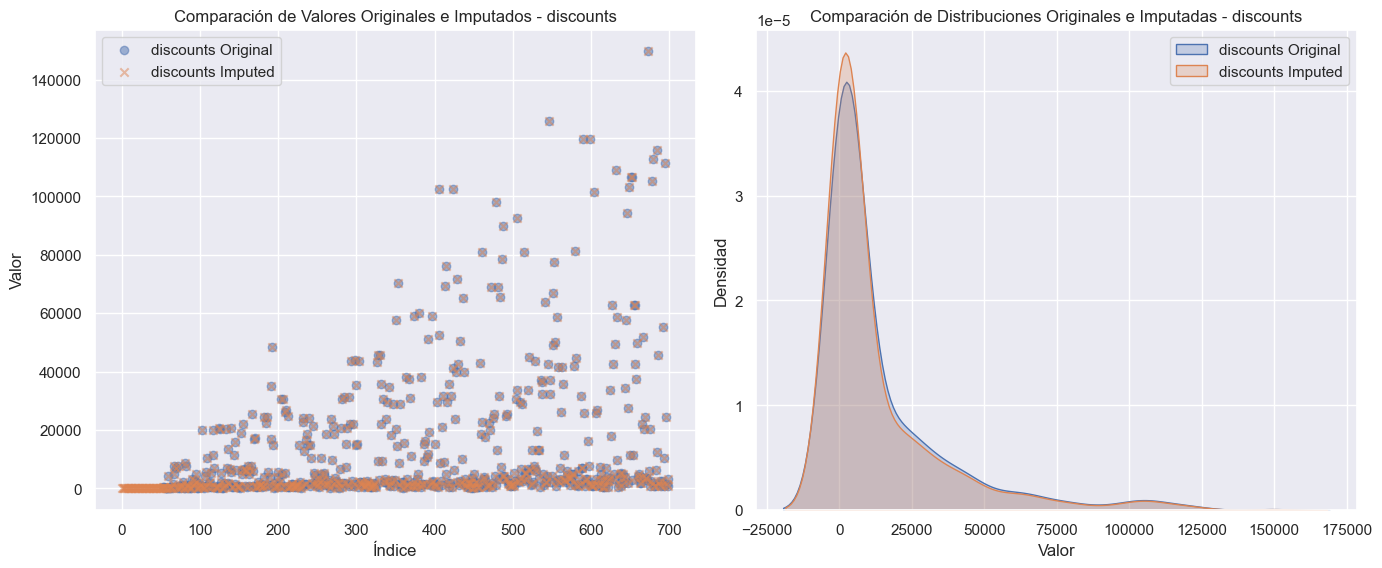

In [36]:
compare_statistics("discounts")
ks_test("discounts")
plot_imputation_comparison('discounts')


Comparación de estadísticas para la columna: profit
            Original        Imputed
count     637.000000     700.000000
mean    27741.010267   24133.860374
std     43059.332905   42760.626583
min       285.600000  -40617.500730
25%      3875.850000    2805.960000
50%     11106.100000    9242.200000
75%     25162.000000   22662.000000
max    262200.000000  262200.000000

Prueba KS para la columna profit:
KS Statistic: 0.09, P-value: 0.008285658029317574


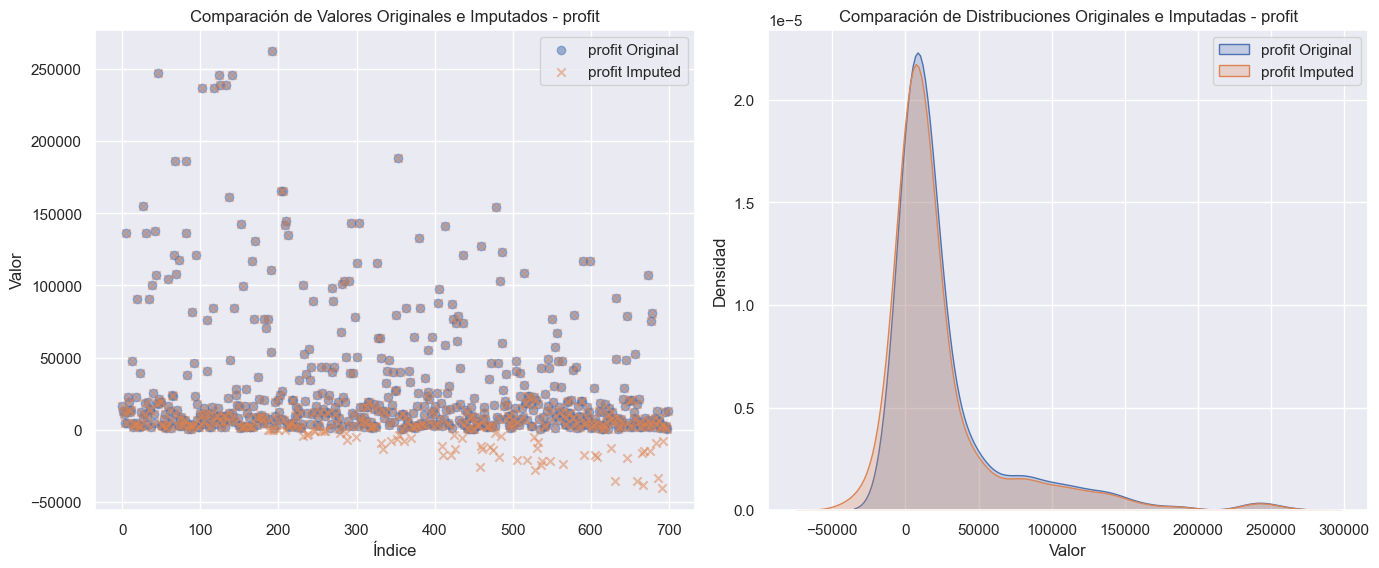

In [37]:
compare_statistics("profit")
ks_test("profit")
plot_imputation_comparison('profit')

### 2_Cofificaciones de variables categoricas

In [17]:
num_col=[]
cat_col=[]
for col in data   .columns:
    if data[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)

['segment', 'country', 'product', 'discount_band', 'month_name']


In [41]:
cols_cat = ["segment","country","product","discount_band","month_name"]
for col in cols_cat:
    print(f"Columna '{col}' tiene {data[col].nunique()} subniveles {data[col].unique()}")

Columna 'segment' tiene 5 subniveles ['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']
Columna 'country' tiene 5 subniveles ['Canada' 'Germany' 'France' 'Mexico' 'United States of America']
Columna 'product' tiene 6 subniveles [' Carretera ' ' Montana ' ' Paseo ' ' Velo ' ' VTT ' ' Amarilla ']
Columna 'discount_band' tiene 4 subniveles [' None ' ' Low ' ' Medium ' ' High ']
Columna 'month_name' tiene 12 subniveles [' January ' ' June ' ' December ' ' March ' ' July ' ' August '
 ' September ' ' October ' ' February ' ' November ' ' April ' ' May ']


#### Variables Nominales

In [68]:
# Codificacion de la variable segment con Labelencoder
status_enc = LabelEncoder()
data_imputed_knn["segment"] = status_enc.fit_transform(data_imputed_knn["segment"])

status_mapping = dict(zip(status_enc.classes_, status_enc.transform(status_enc.classes_)))
print("Relación entre valores originales y codificados:", status_mapping)

Relación entre valores originales y codificados: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [69]:
# Codificacion de la variable country con Labelencoder
status_enc = LabelEncoder()
data_imputed_knn["country"] = status_enc.fit_transform(data_imputed_knn["country"])

status_mapping = dict(zip(status_enc.classes_, status_enc.transform(status_enc.classes_)))
print("Relación entre valores originales y codificados:", status_mapping)

Relación entre valores originales y codificados: {'Canada': 0, 'France': 1, 'Germany': 2, 'Mexico': 3, 'United States of America': 4}


In [70]:
# Codificacion de la variable product con Labelencoder
status_enc = LabelEncoder()
data_imputed_knn["product"] = status_enc.fit_transform(data_imputed_knn["product"])

status_mapping = dict(zip(status_enc.classes_, status_enc.transform(status_enc.classes_)))
print("Relación entre valores originales y codificados:", status_mapping)

Relación entre valores originales y codificados: {' Amarilla ': 0, ' Carretera ': 1, ' Montana ': 2, ' Paseo ': 3, ' VTT ': 4, ' Velo ': 5}


In [71]:
# Codificacion de la variable discount_band con Labelencoder
status_enc = LabelEncoder()
data_imputed_knn["discount_band"] = status_enc.fit_transform(data_imputed_knn["discount_band"])

status_mapping = dict(zip(status_enc.classes_, status_enc.transform(status_enc.classes_)))
print("Relación entre valores originales y codificados:", status_mapping)

Relación entre valores originales y codificados: {' High ': 0, ' Low ': 1, ' Medium ': 2, ' None ': 3}


In [72]:
# Codificacion de la variable month_name con Labelencoder
status_enc = LabelEncoder()
data_imputed_knn["month_name"] = status_enc.fit_transform(data_imputed_knn["month_name"])

status_mapping = dict(zip(status_enc.classes_, status_enc.transform(status_enc.classes_)))
print("Relación entre valores originales y codificados:", status_mapping)

Relación entre valores originales y codificados: {' April ': 0, ' August ': 1, ' December ': 2, ' February ': 3, ' January ': 4, ' July ': 5, ' June ': 6, ' March ': 7, ' May ': 8, ' November ': 9, ' October ': 10, ' September ': 11}


In [73]:
data_imputed_knn.head(3)

,segment,country,product,discount_band,date,month_name,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
0,2,0,1,3,2014-01-01,4,1618.5,3.0,20.0,32370.0,1597.88,32370.0,16185.0,16185.0,1.0,2014.0
1,2,2,1,3,2014-01-01,4,1321.0,3.0,20.0,26420.0,1308.34,26420.0,13210.0,13210.0,1.0,2014.0
2,3,1,1,3,2014-01-06,6,2178.0,3.0,15.0,32670.0,1119.66,32670.0,21780.0,10890.0,6.0,2014.0


In [74]:
ruta_archivo = 'D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/data_.csv'
data_imputed_knn.to_csv(ruta_archivo, index=False, encoding='utf-8')

#### Variables Ordinales

In [12]:
data_1 = pd.read_csv('D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/data_.csv')
data_1.head(3)

,segment,country,product,discount_band,date,month_name,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
0,2,0,1,3,2014-01-01,4,1618.5,3.0,20.0,32370.0,1597.88,32370.0,16185.0,16185.0,1.0,2014.0
1,2,2,1,3,2014-01-01,4,1321.0,3.0,20.0,26420.0,1308.34,26420.0,13210.0,13210.0,1.0,2014.0
2,3,1,1,3,2014-01-06,6,2178.0,3.0,15.0,32670.0,1119.66,32670.0,21780.0,10890.0,6.0,2014.0


#### 4_ Outliers

In [13]:
# Function to calculate outlier thresholds
def outlier_threshold(dataframe, column, q1=0.25, q3=0.75):
    Q1 = dataframe[column].quantile(q1)
    Q3 = dataframe[column].quantile(q3)
    iqr = Q3 - Q1
    up_limit = Q3 + 1.5 * iqr
    low_limit = Q1 - 1.5 * iqr
    return low_limit, up_limit

# Function to calculate outlier percentage
def outlier_percentage(dataframe, column):
    low_limit, up_limit = outlier_threshold(dataframe, column)
    outliers = dataframe[(dataframe[column] < low_limit) | (dataframe[column] > up_limit)]
    percentage = (len(outliers) / len(dataframe)) * 100
    print(f"{column} Outliers percentage: {percentage:.2f}%")
    print("-------------------------")

# Function to check if there are any outliers
def check_outliers(dataframe, column):
    low_limit, up_limit = outlier_threshold(dataframe, column)
    outliers = (dataframe[column] > up_limit) | (dataframe[column] < low_limit)
    return outliers.any()

# Function to replace outliers with threshold values
def replace_with_thresholds(dataframe, column):
    low_limit, up_limit = outlier_threshold(dataframe, column)
    dataframe[column] = dataframe[column].clip(lower=low_limit, upper=up_limit)

# Main execution function
def process_outliers(dataframe, num_columns, drop_column='Year'):
    # If num_columns is a list, convert it to a DataFrame with the selected columns
    if isinstance(num_columns, list):
        num_columns = dataframe[num_columns]
    
    # Drop specified column and process each numerical column
    num_columns = num_columns.drop(columns=drop_column, errors='ignore')
    for col in num_columns.columns:
        outlier_percentage(dataframe, col)
        replace_with_thresholds(dataframe, col)
        print(f"{col} still has outliers: {check_outliers(dataframe, col)}")

In [18]:
num_col
process_outliers(data_1, num_col)

units_sold Outliers percentage: 0.57%
-------------------------
units_sold still has outliers: False
manufacturing_price Outliers percentage: 0.00%
-------------------------
manufacturing_price still has outliers: False
sale_price Outliers percentage: 0.00%
-------------------------
sale_price still has outliers: False
gross_sales Outliers percentage: 7.86%
-------------------------
gross_sales still has outliers: False
discounts Outliers percentage: 8.14%
-------------------------
discounts still has outliers: False
sales Outliers percentage: 7.57%
-------------------------
sales still has outliers: False
cogs Outliers percentage: 5.14%
-------------------------
cogs still has outliers: False
profit Outliers percentage: 13.71%
-------------------------
profit still has outliers: False


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [19]:
# Manaera mejoradad de sacar los valores atipicos
numeric = data_1.select_dtypes(include=["float64", "int64"])
q1 = numeric.quantile(0.25)
q3 = numeric.quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

# Calcular los límites para los outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Encontrar outliers
outliers = (numeric < limite_inferior) | (numeric > limite_superior)
print(outliers.sum())

segment                  0
country                  0
product                  0
discount_band            0
month_name               0
units_sold               0
manufacturing_price      0
sale_price               0
gross_sales              0
discounts                0
sales                    0
cogs                     0
profit                   0
month_number             0
year                   175
dtype: int64


In [21]:
data_1.to_csv('D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/data_noutliers.csv', index=False, encoding='utf-8')